In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df1 = pd.read_csv('1_2A.csv')
df2 = pd.read_csv('1_2B.csv')
df3 = pd.read_csv('1_3A.csv')
df4 = pd.read_csv('1_4A.csv')

#Preparing file 1


In [101]:
df1.head()

,DEPTH_WMSF_m,DHAP_kpa,DHAT_degC
0,0.0380,10790.29,6.0
1,0.1904,10783.40,6.0
2,0.3428,10800.60,6.0
3,0.4952,10783.40,6.0
4,0.6476,10800.64,6.0


##Converting kpa to psi

In [102]:
df1['DHAP_psi'] = df1['DHAP_kpa']/6.89476
df1.head()

,DEPTH_WMSF_m,DHAP_kpa,DHAT_degC,DHAP_psi
0,0.0380,10790.29,6.0,1564.998637
1,0.1904,10783.40,6.0,1563.999327
2,0.3428,10800.60,6.0,1566.493975
3,0.4952,10783.40,6.0,1563.999327
4,0.6476,10800.64,6.0,1566.499777


In [103]:
df1.drop('DHAP_kpa',axis=1,inplace=True)
df1.drop('DHAT_degC',axis=1,inplace=True)

In [104]:
df1.head()

,DEPTH_WMSF_m,DHAP_psi
0,0.0380,1564.998637
1,0.1904,1563.999327
2,0.3428,1566.493975
3,0.4952,1563.999327
4,0.6476,1566.499777


##renaming column titles

In [105]:
df1.rename(columns={'DEPTH_WMSF_m': 'DEPTH_m'}, inplace=True)
df1.head()

,DEPTH_m,DHAP_psi
0,0.0380,1564.998637
1,0.1904,1563.999327
2,0.3428,1566.493975
3,0.4952,1563.999327
4,0.6476,1566.499777


In [106]:
df1.shape

(348, 2)

##df1 ready

#Preparing file 2

In [107]:
df2.head()

,DEPTH_m,DHAP_psi,DHAT_degC
0,22.0024,1609.0,9
1,22.1548,1609.0,9
2,22.3072,1609.0,9
3,22.4596,1609.0,9
4,22.6120,1609.0,9


In [108]:
df2.drop('DHAT_degC',axis=1,inplace=True)
df2.head()

,DEPTH_m,DHAP_psi
0,22.0024,1609.0
1,22.1548,1609.0
2,22.3072,1609.0
3,22.4596,1609.0
4,22.6120,1609.0


In [109]:
df2.shape

(1530, 2)

##df2 ready

#Preparing file 3

In [110]:
df3.head()

,DEPTH_m,DHAP_psi,DHAT_degC
0,10.1276,204.0,21.0
1,10.2800,204.0,21.0
2,10.4324,204.0,21.0
3,10.5848,204.0,21.0
4,10.7372,204.0,21.0


In [111]:
df3.drop('DHAT_degC',axis=1,inplace=True)
df3.head()

,DEPTH_m,DHAP_psi
0,10.1276,204.0
1,10.2800,204.0
2,10.4324,204.0
3,10.5848,204.0
4,10.7372,204.0


In [112]:
df3.shape

(1943, 2)

##df3 ready

#Preparing file 4

In [113]:
df4.head()

,DEPTH_m,DHAP_psi,DHAT_degC
0,0.0641,1532.0,5.0
1,0.2165,1532.0,5.0
2,0.3689,1532.0,5.0
3,0.5213,1532.0,5.0
4,0.6737,1532.0,5.0


In [114]:
df4.drop('DHAT_degC',axis=1,inplace=True)
df4.head()

,DEPTH_m,DHAP_psi
0,0.0641,1532.0
1,0.2165,1532.0
2,0.3689,1532.0
3,0.5213,1532.0
4,0.6737,1532.0


In [115]:
df4.shape

(2025, 2)

##df4 ready

#Combining df1, df2 and df3 for training data
#df4 for test data

In [116]:
df_train = pd.concat([df1, df2,df3], axis=0)
df_train.shape

(3821, 2)

In [117]:
df_train.head()

,DEPTH_m,DHAP_psi
0,0.0380,1564.998637
1,0.1904,1563.999327
2,0.3428,1566.493975
3,0.4952,1563.999327
4,0.6476,1566.499777


In [118]:
df_train.describe()

,DEPTH_m,DHAP_psi
count,3821.000000,3821.000000
mean,138.273316,1764.417612
std,83.013798,327.611572
min,0.038000,204.000000
25%,62.248400,1684.000000
50%,135.083200,1805.000000
75%,207.790400,1936.000000
max,306.088400,2108.000000


##No Missing Values

##Analysing Scatter Plot

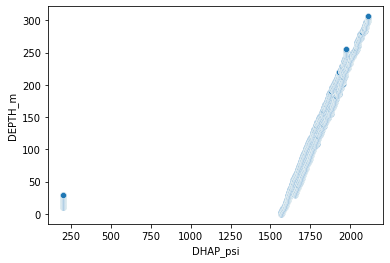

In [119]:
sns.scatterplot(y=df_train['DEPTH_m'],x=df_train['DHAP_psi'])

In [120]:
df_test = df4

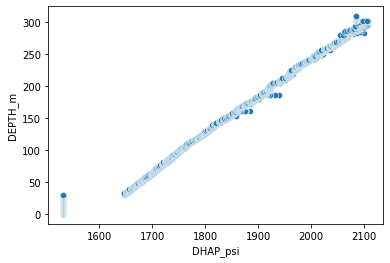

In [121]:
sns.scatterplot(y=df_test['DEPTH_m'],x=df_test['DHAP_psi'])

##The outlier Data can distort the prediction model


#Removing Outliers

In [122]:
df_train  = df_train[df_train['DHAP_psi']>1500]

In [123]:
df_train.shape

(3689, 2)

In [124]:
df_test = df_test[df_test['DHAP_psi']>1600]
df_test.shape

(1826, 2)

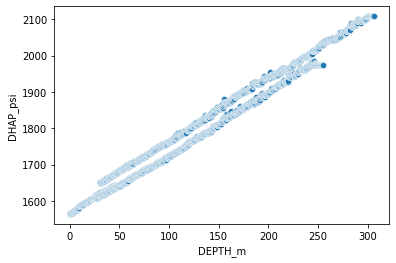

In [125]:
sns.scatterplot(x=df_train['DEPTH_m'],y=df_train['DHAP_psi'])

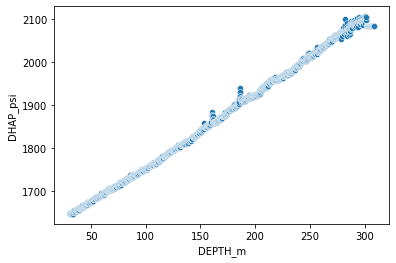

In [126]:
sns.scatterplot(x=df_test['DEPTH_m'],y=df_test['DHAP_psi'])

#Preparing Train Test Data

In [127]:
X_train = df_train['DEPTH_m']
Y_train = df_train['DHAP_psi']

In [128]:
X_train.head()

0    0.0380
1    0.1904
2    0.3428
3    0.4952
4    0.6476
Name: DEPTH_m, dtype: float64

In [129]:
Y_train.head()

0    1564.998637
1    1563.999327
2    1566.493975
3    1563.999327
4    1566.499777
Name: DHAP_psi, dtype: float64

In [130]:
X_test = df_test['DEPTH_m']
Y_test = df_test['DHAP_psi']

In [131]:
X_test.head()

199    30.3917
200    30.5441
201    30.6965
202    30.8489
203    31.0013
Name: DEPTH_m, dtype: float64

In [132]:
Y_test.head()

199    1647.0
200    1649.0
201    1650.0
202    1649.0
203    1648.0
Name: DHAP_psi, dtype: float64

In [133]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(3689,) (3689,) (1826,) (1826,)


In [134]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

In [135]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(3689, 1) (3689, 1) (1826, 1) (1826, 1)


#Implementing Models

#Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100,criterion='absolute_error', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [137]:
rf_reg.fit(X_train,Y_train.ravel())

RandomForestRegressor(criterion='absolute_error')

In [138]:
y_pred_train = rf_reg.predict(X_train)

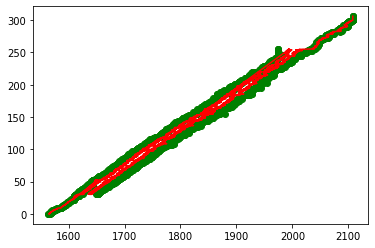

In [139]:
plt.scatter(Y_train,X_train,color='g')
plt.plot(y_pred_train,X_train,color='r')
plt.show()

##Y_pred are the predicted values (of 4th file)

In [140]:
Y_pred = rf_reg.predict(X_test)

Blue - original data of file(1,2,3)

Yellow - predicted data of file(1,2,3)

Green - original data of file(4)

Red - predicted data of file(4)

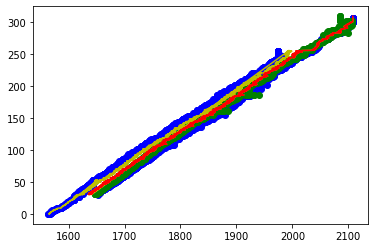

In [141]:
plt.scatter(Y_train,X_train,color='b')
plt.plot(y_pred_train,X_train,color='y')
plt.scatter(Y_test,X_test,color='g')
plt.plot(Y_pred,X_test,color='r')
plt.show()

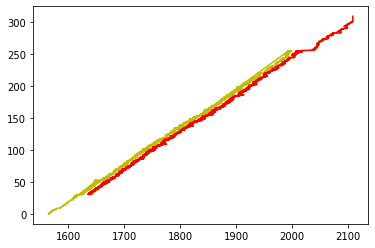

In [142]:
plt.plot(y_pred_train,X_train,color='y')
plt.plot(Y_pred,X_test,color='r')
plt.show()

In [143]:
print(rf_reg.score(X_train,Y_train))
print(rf_reg.score(X_test,Y_test))

0.992921079481614
0.9971703028285557


In [144]:
rf_reg.predict([[0.6476]])

array([1565.84945669])

In [145]:
rf_reg.predict([[50.0513]])

array([1674.00190619])

In [146]:
rf_reg.predict([[220.7393]])

array([1959.54])

In [147]:
##rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
#print("\nRMSE: ", rmse)

#Linear Regressor

In [148]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [149]:
lin_reg.fit(X_train,Y_train.ravel())

LinearRegression()

In [150]:
y_pred_train = lin_reg.predict(X_train)

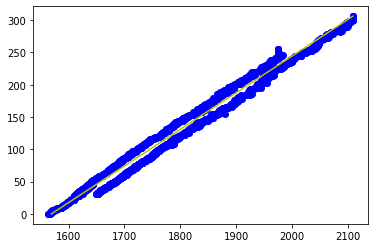

In [151]:
plt.scatter(Y_train,X_train,color='b')
plt.plot(y_pred_train,X_train,color='y')
plt.show()

##Y_pred are the predicted values (of 4th file)

In [152]:
Y_pred = lin_reg.predict(X_test)

Blue - original data of file(1,2,3)

Yellow - predicted data of file(1,2,3)

Green - original data of file(4)

Red - predicted data of file(4)

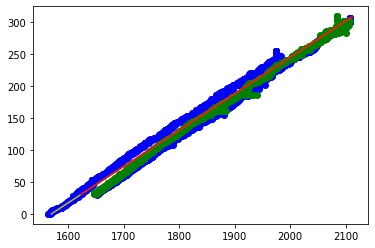

In [153]:
plt.scatter(Y_train,X_train,color='b')
plt.plot(y_pred_train,X_train,color='y')
plt.scatter(Y_test,X_test,color='g')
plt.plot(Y_pred,X_test,color='r')
plt.show()

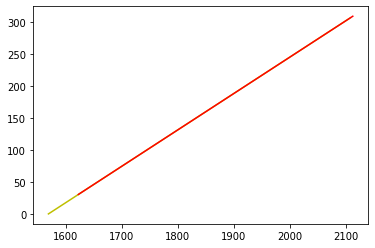

In [154]:
plt.plot(y_pred_train,X_train,color='y')
plt.plot(Y_pred,X_test,color='r')
plt.show()

In [155]:
print(lin_reg.score(X_train,Y_train))
print(lin_reg.score(X_test,Y_test))

0.9831329830067863
0.9932612031391336


In [156]:
lin_reg.predict([[0.6476]])

array([1570.30328205])

In [157]:
lin_reg.predict([[50.0513]])

array([1657.35357502])

In [158]:
lin_reg.predict([[220.7393]])

array([1958.10919464])

In [159]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("\nRMSE: ", rmse)


RMSE:  11.227352138818793


#SVM Regressor

In [160]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error # for calculating the cost function
svm_reg = SVR()

In [161]:
svm_reg.fit(X_train,Y_train.ravel())

SVR()

In [162]:
y_pred_train = svm_reg.predict(X_train)

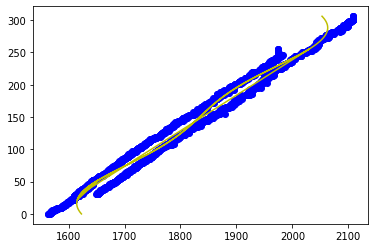

In [163]:
plt.scatter(Y_train,X_train,color='b')
plt.plot(y_pred_train,X_train,color='y')
plt.show()

##Y_pred are the predicted values (of 4th file)

In [164]:
Y_pred = svm_reg.predict(X_test)

Blue - original data of file(1,2,3)

Yellow - predicted data of file(1,2,3)

Green - original data of file(4)

Red - predicted data of file(4)

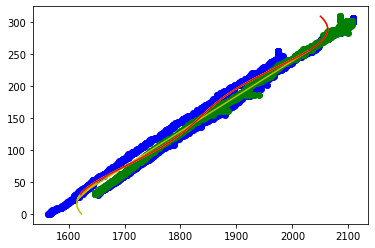

In [165]:
plt.scatter(Y_train,X_train,color='b')
plt.plot(y_pred_train,X_train,color='y')
plt.scatter(Y_test,X_test,color='g')
plt.plot(Y_pred,X_test,color='r')
plt.show()

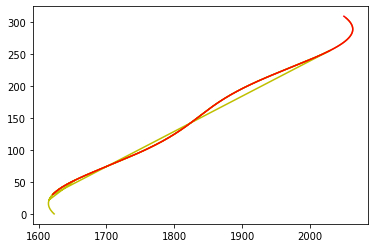

In [166]:
plt.plot(y_pred_train,X_train,color='y')
plt.plot(Y_pred,X_test,color='r')
plt.show()

In [167]:
print(svm_reg.score(X_train,Y_train))
print(svm_reg.score(X_test,Y_test))

0.9742354964825758
0.9844747433257028


In [168]:
svm_reg.predict([[0.6476]])

array([1622.37464581])

In [169]:
svm_reg.predict([[50.0513]])

array([1648.67395553])

In [170]:
# Initializing the SVR model with 10 decision trees
model = SVR(kernel = 'rbf')
# Fitting the SVR model to the data
model.fit(X_train, Y_train.ravel())

SVR()

In [171]:
svm_reg.predict([[220.7393]])

array([1953.36199481])

In [172]:
# RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("\nRMSE: ", rmse)






RMSE:  17.041411215998206
